In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,classification_report
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string
import nltk

In [12]:
train_data_path="/content/train_data.txt"
test_data_path="/content/test_data.txt"
data_description="/content/description.txt"
test_data_solution="/content/test_data_solution.txt"

In [13]:
train_data=pd.read_csv(train_data_path,sep=':::', names=['Title', 'Genre', 'Description'],header=None, engine='python')

In [14]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [15]:
test_data = pd.read_csv(test_data_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [17]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [18]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [20]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [21]:
#Count each genre value
train_data.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

<ipython-input-22-e3967934d931>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Distribution of Genres')

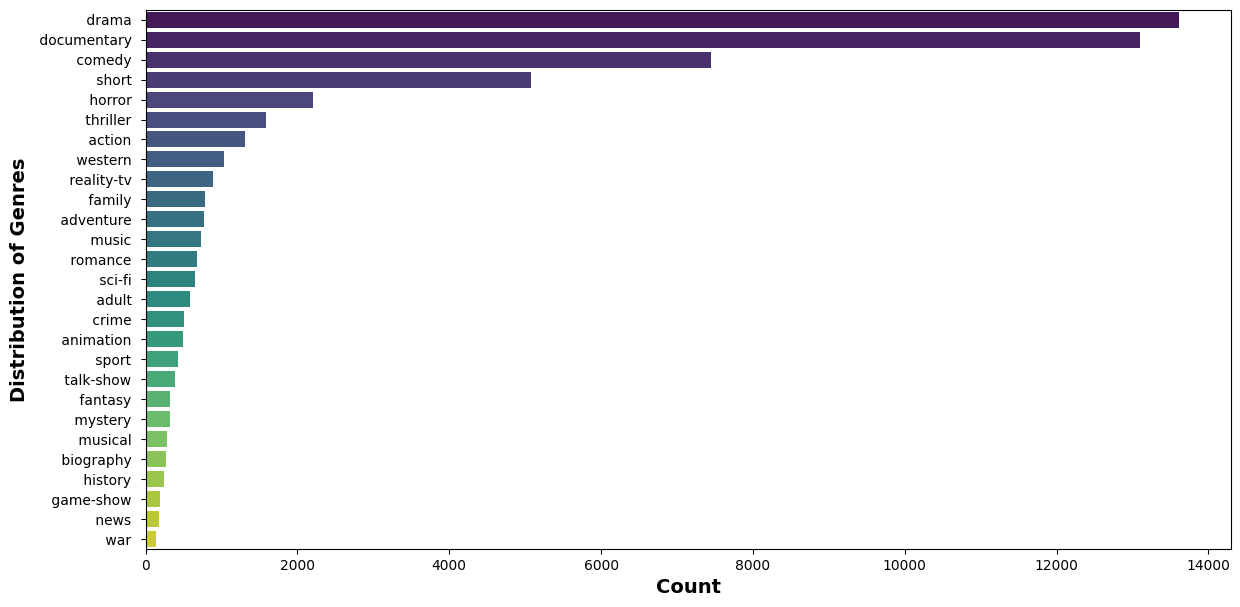

In [22]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Distribution of Genres', fontsize=14, fontweight='bold')


<ipython-input-23-3b418856404e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='mako')


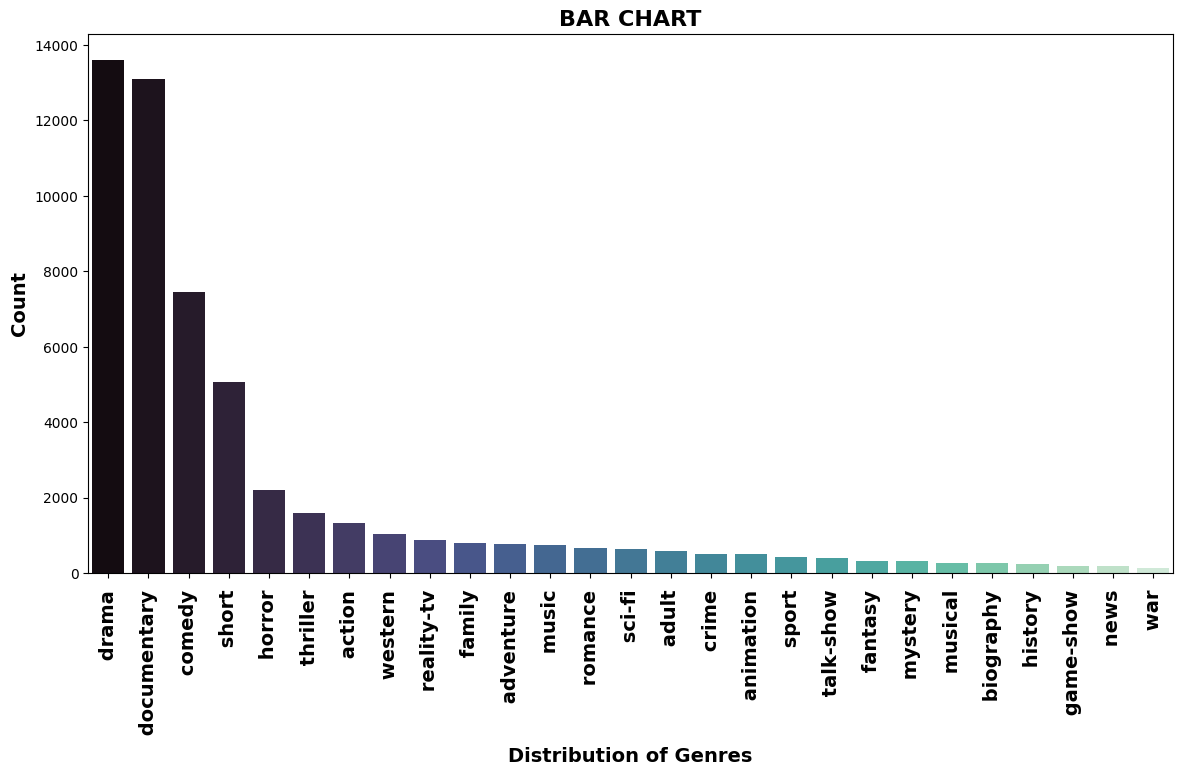

In [23]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='mako')
plt.xlabel('Distribution of Genres', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('BAR CHART', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
# Function to clean description
def clean_description(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

In [27]:
# Apply cleaning function to Description column
train_data['Clean_Description'] = train_data['Description'].apply(clean_description)

In [28]:
train_data.head()

,Title,Genre,Description,Clean_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


In [29]:
# Apply cleaning function to Description column
test_data['Clean_Description'] = test_data['Description'].apply(clean_description)

In [31]:
test_data.head()

,Id,Title,Description,Clean_Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [32]:
train_data.drop(columns=["Description"],inplace=True)

In [33]:
train_data.head()

,Title,Genre,Clean_Description
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents year old...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,films title refers recovered bodies ground zer...


In [34]:
train_data['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
train_data['genre_encoded'] = le.fit_transform(train_data['Genre'])

In [37]:
train_data

,Title,Genre,Clean_Description,genre_encoded
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents year old...,8
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,24
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...,1
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...,8
5,The Unrecovered (2007),drama,films title refers recovered bodies ground zer...,8
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,short lived nbc live sitcom centered bonino wo...,5
54211,Dead Girls Don't Cry (????),horror,next generation exploitation sisters kapa bay ...,13
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,bestaan echt stand comedy growing facing fears...,7
54213,Make Your Own Bed (1944),comedy,walter vivian live country difficult time keep...,5


In [38]:
# Splitting the data into train and validation sets
X = train_data['Clean_Description']
y = train_data['genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [39]:
X

1        listening conversation doctor parents year old...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers recovered bodies ground zer...
                               ...                        
54210    short lived nbc live sitcom centered bonino wo...
54211    next generation exploitation sisters kapa bay ...
54212    bestaan echt stand comedy growing facing fears...
54213    walter vivian live country difficult time keep...
54214    labor day weekend intense hurricane ever make ...
Name: Clean_Description, Length: 54214, dtype: object

In [40]:
y

1         8
2        24
3         1
4         8
5         8
         ..
54210     5
54211    13
54212     7
54213     5
54214    12
Name: genre_encoded, Length: 54214, dtype: int64

In [41]:
X_train.shape

(37949,)

In [42]:
y_test.shape

(16265,)

In [43]:
y_train.shape

(37949,)

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [45]:
X_train_tfidf  = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf  = tfidf_vectorizer.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
'''svc_model = SVC(kernel='linear')
svc_model.fit(X_train_tfidf, y_train)'''

"svc_model = SVC(kernel='linear')\nsvc_model.fit(X_train_tfidf, y_train)"

In [48]:
model=LogisticRegression()
model.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Predictions
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

In [53]:
print("Training Set Performance:")
print(classification_report(y_train, y_pred_train))
print("Testing Set Performance:")
print(classification_report(y_test, y_pred_test))


Training Set Performance:
              precision    recall  f1-score   support

           0       0.67      0.39      0.49       917
           1       0.87      0.38      0.52       434
           2       0.83      0.26      0.39       555
           3       0.88      0.17      0.29       352
           4       0.00      0.00      0.00       177
           5       0.63      0.71      0.67      5232
           6       0.64      0.08      0.15       341
           7       0.72      0.91      0.80      9154
           8       0.61      0.85      0.71      9537
           9       0.74      0.16      0.26       566
          10       1.00      0.04      0.07       220
          11       0.93      0.58      0.72       139
          12       0.00      0.00      0.00       170
          13       0.78      0.71      0.74      1578
          14       0.78      0.54      0.64       514
          15       0.70      0.04      0.07       200
          16       0.78      0.03      0.06       229
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.53      0.26      0.35       398
           1       0.63      0.19      0.29       156
           2       0.49      0.15      0.23       220
           3       0.57      0.05      0.10       146
           4       0.00      0.00      0.00        88
           5       0.51      0.58      0.54      2215
           6       0.11      0.01      0.01       164
           7       0.66      0.85      0.74      3942
           8       0.54      0.78      0.64      4076
           9       0.46      0.08      0.13       218
          10       0.00      0.00      0.00       103
          11       0.92      0.40      0.56        55
          12       0.00      0.00      0.00        73
          13       0.64      0.54      0.59       626
          14       0.67      0.43      0.53       217
          15       0.67      0.05      0.10        77
          16       0.00      0.00      0.00        90
          17       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.metrics import confusion_matrix

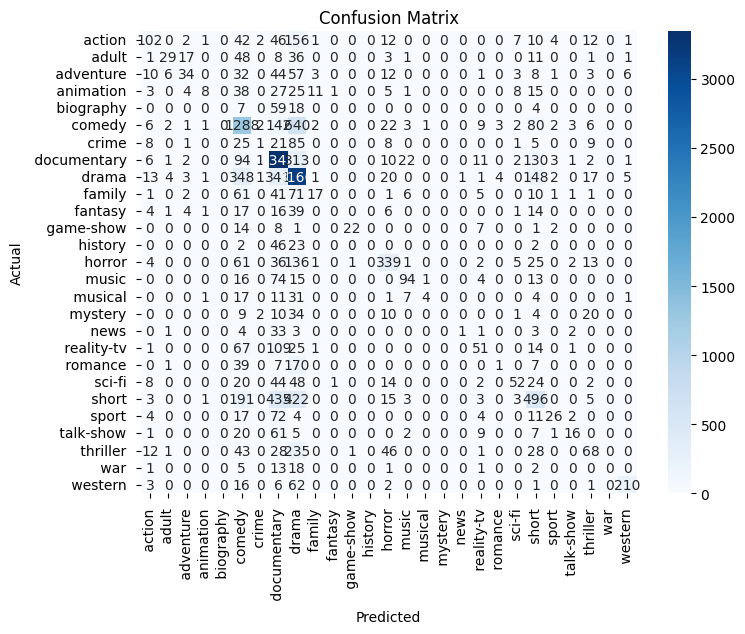

In [57]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6707
Testing Accuracy: 0.5760


In [62]:
def classify_movie_genre():
    # Take user input for the movie plot
    plot_text = input("Enter the plot of the movie: ")

    # Apply TF-IDF vectorization to user input
    plot_tfidf = tfidf_vectorizer.transform([plot_text])

    # Predict the genre
    genre_encoded = model.predict(plot_tfidf)

    # Decode the genre label
    predicted_genre = le.inverse_transform(genre_encoded)[0]

    return predicted_genre

# Example usage
predicted_genre = classify_movie_genre()
print("Predicted Genre:", predicted_genre)

Enter the plot of the movie: a horror movie which scares people
Predicted Genre:  horror 


In [64]:
!pip install joblib


In [66]:
import joblib

# Save the pre-trained model and vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(model, "model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']